### General description of the dataset

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv('agaricus-lepiota.data', sep=',', header=None)
# Add column IDs
# I am lazy so I will just read them from a file
colnames = pd.read_csv('colnames.txt', header=None)
colID = ['target']
for i in colnames[0]:
    colID.append(i)

data.columns = colID
target_var = data['target']
data.drop('target', axis = 1, inplace=True)
y = LabelEncoder().fit_transform(target_var) # p == 1, e == 0
print(data.columns)
data.head()

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises?', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


### Question to answer with the dataset

1. is there a quick and simple parameter that could be able to discriminate between poisonous and non poisonous data (reasoning with animals)?

2. is there any observable variation for plant parts (cap, gill, stalk, veil, or ring) able to discriminate between poisonous and edible mushrooms (you can use LDA on single organs?

3. Use the full dataset and LDA to identify differences?

### 1. is there a quick and simple parameter that could be able to discriminate between poisonous and non poisonous data (reasoning with animals)

        E    P
odor          
a     1.0  0.0
c     0.0  1.0
f     0.0  1.0
l     1.0  0.0
m     0.0  1.0


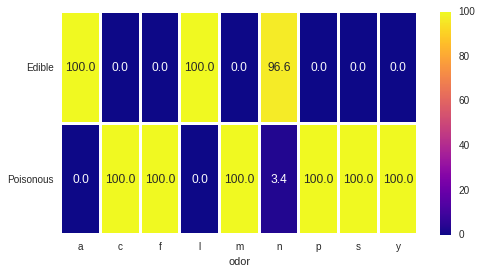

In [3]:
# Animals have good smells and need to recognize if a mushroom is poisonous
# I will look

# create DF with odor data
odor = pd.DataFrame({'p':y, 'odor':data['odor']})
odor_poison = odor.groupby('odor').sum()
odor_poison_size = odor.groupby('odor').size()
odor_data = pd.DataFrame({'P': odor_poison['p']/odor_poison_size, 
                          'E':(odor_poison_size-odor_poison['p'])/odor_poison_size})
print(odor_data.head())
plt.figure(figsize=(8,4))
sns.set(style='whitegrid', context='notebook')
sns.heatmap(odor_data.T*100, fmt = '.1f', cmap = 'plasma', cbar = True, annot = True, 
            linewidth = 2, yticklabels=('Edible', 'Poisonous'))
plt.yticks(rotation=0)
plt.show()

             precision    recall  f1-score   support

     edible       0.97      1.00      0.99      4208
  poisonous       1.00      0.97      0.98      3916

avg / total       0.99      0.99      0.99      8124

Accuracy:  0.985228951256


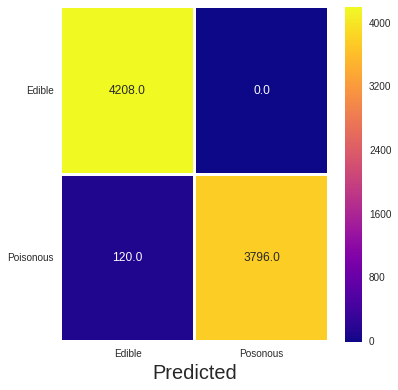

In [4]:
## create a small decision rule for categorical variables
def odor_decision_rule(odor_vars):
    non_poison = ['a', 'l', 'n']
    pred = [0 if i in non_poison else 1 for i in odor_vars]
    return pred

X = data['odor'].values
pred = odor_decision_rule(X)
print(classification_report(y, pred, target_names = ['edible', 'poisonous']))
print('Accuracy: ', accuracy_score(y, pred))
plt.figure(figsize = (6,6))
sns.heatmap(confusion_matrix(y, pred),
           cmap = 'plasma', annot = True,
            fmt = '.1f', cbar = True,linewidth = 2, 
            yticklabels=('Edible', 'Poisonous'),
            xticklabels=('Edible', 'Posonous')
           )
plt.yticks(rotation=0)
plt.xlabel('Predicted', fontsize=20)
plt.ylabel
plt.show()


## 2. is there any observable variation for plant parts (cap, gill, stalk, veil, or ring) able to discriminate between poisonous and edible mushrooms (you can use LDA on single organs?

### 2.1 caps

In [26]:
caps = data[['cap-shape', 'cap-surface', 'cap-color']]
X_dum = pd.get_dummies(caps).values

X_train, X_test, y_train, y_test= train_test_split(X_dum, y,
                                                  test_size=0.2, random_state=101)

rfc_caps = RandomForestClassifier(n_estimators=1000, random_state=42)
rfc_caps.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

             precision    recall  f1-score   support

     edible       0.71      0.76      0.73      3357
  poisonous       0.72      0.66      0.69      3142

avg / total       0.71      0.71      0.71      6499

Accuracy:  0.713802123404


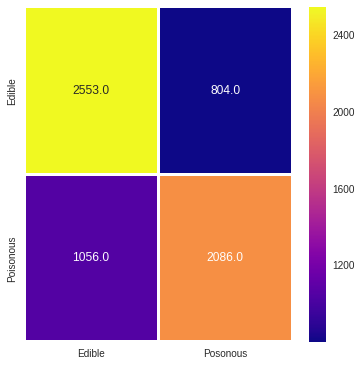

In [27]:
# test in sample precision
y_train_pred = rfc_caps.predict(X_train)
print(classification_report(y_train, y_train_pred, target_names = ['edible', 'poisonous']))
print('Accuracy: ', accuracy_score(y_train, y_train_pred))
plt.figure(figsize = (6,6))
sns.heatmap(confusion_matrix(y_train, y_train_pred),
           cmap = 'plasma', annot = True,
            fmt = '.1f', cbar = True,linewidth = 2, 
            yticklabels=('Edible', 'Poisonous'),
            xticklabels=('Edible', 'Posonous')
           )
plt.show()

             precision    recall  f1-score   support

          0       0.71      0.75      0.73       851
          1       0.71      0.67      0.69       774

avg / total       0.71      0.71      0.71      1625

Accuracy:  0.712


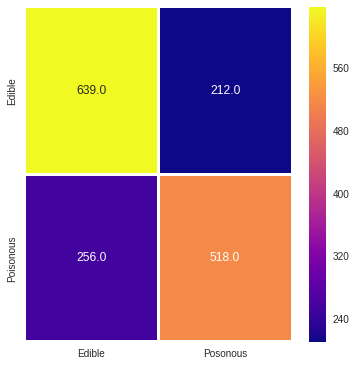

In [28]:
# out of sample precision
y_test_pred = rfc_caps.predict(X_test)
print(classification_report(y_test, y_test_pred))
print('Accuracy: ', accuracy_score(y_test, y_test_pred))
plt.figure(figsize = (6,6))

sns.heatmap(confusion_matrix(y_test, y_test_pred),
           cmap = 'plasma', annot = True,
            fmt = '.1f', cbar = True,linewidth = 2, 
            yticklabels=('Edible', 'Poisonous'),
            xticklabels=('Edible', 'Posonous')
           )

Not really good though, even though the model is not overfitting!!

### 2.2 Gills

In [30]:
gills = data[['gill-attachment', 'gill-spacing', 'gill-size', 'gill-color']]

X_gills = pd.get_dummies(gills).values

X_train, X_test, y_train, y_test = train_test_split(X_gills, y,
                                                   test_size = 0.2, random_state = 101)

rfc_gills = RandomForestClassifier(n_estimators=1000, random_state=42)

rfc_gills.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [24]:
# In sample precision
y_train_pred = rfc_gills.predict(X_train)
print(classification_report(y_train, y_train_pred))
print('Accuracy: ', accuracy_score(y_train, y_train_pred))

             precision    recall  f1-score   support

          0       0.94      0.83      0.88      3357
          1       0.84      0.94      0.89      3142

avg / total       0.89      0.88      0.88      6499

Accuracy:  0.884905370057


In [25]:
# out of sample precision
y_test_pred = rfc_gills.predict(X_test)
print(classification_report(y_test, y_test_pred))
print('Accuracy: ', accuracy_score(y_test, y_test_pred))

             precision    recall  f1-score   support

          0       0.93      0.82      0.87       851
          1       0.82      0.94      0.88       774

avg / total       0.88      0.87      0.87      1625

Accuracy:  0.873230769231


Gills are definitely a best predictor overall for this problem

### 2.3 Stalk

In [33]:
stalks = data[['stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring']]

X_stalks = pd.get_dummies(stalks).values

X_train, X_test, y_train, y_test = train_test_split(X_stalks, y,
                                                   test_size=0.2, random_state=101)

rfc_stalks = RandomForestClassifier(n_estimators=1000, random_state=42)
rfc_stalks.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [35]:
# in sample
y_train_pred = rfc_stalks.predict(X_train)
print(classification_report(y_train, y_train_pred))
print('Accuracy: ', accuracy_score(y_train, y_train_pred))

             precision    recall  f1-score   support

          0       0.98      0.97      0.98      3357
          1       0.97      0.98      0.98      3142

avg / total       0.98      0.98      0.98      6499

Accuracy:  0.976304046776


In [36]:
# out of sample
y_test_pred = rfc_stalks.predict(X_test)
print(classification_report(y_test, y_test_pred))
print('Accuracy: ', accuracy_score(y_test, y_test_pred))

             precision    recall  f1-score   support

          0       0.98      0.97      0.97       851
          1       0.97      0.98      0.97       774

avg / total       0.97      0.97      0.97      1625

Accuracy:  0.971692307692


THe stalks are the one most predictive so far

### 2.4 Veil

In [37]:
veil = data[['veil-type', 'veil-color']]

X_veil = pd.get_dummies(veil).values

X_train, X_test, y_train, y_test = train_test_split(X_veil, y,
                                                   test_size=0.2, random_state=101)

rfc_veil = RandomForestClassifier(n_estimators=1000, random_state=42)
rfc_veil.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [39]:
# in sample
y_train_pred = rfc_veil.predict(X_train)
print(classification_report(y_train, y_train_pred))
print('Accuracy: ', accuracy_score(y_train, y_train_pred))

             precision    recall  f1-score   support

          0       0.52      1.00      0.68      3357
          1       1.00      0.00      0.00      3142

avg / total       0.75      0.52      0.35      6499

Accuracy:  0.517464225265


In [40]:
# out of sample
y_test_pred = rfc_veil.predict(X_test)
print(classification_report(y_test, y_test_pred))
print('Accuracy: ', accuracy_score(y_test, y_test_pred))

             precision    recall  f1-score   support

          0       0.52      1.00      0.69       851
          1       1.00      0.00      0.01       774

avg / total       0.75      0.52      0.36      1625

Accuracy:  0.524923076923


 Veil is really accurate for predict poison mushrooms!